## Análise exploratória de dados com Python

Como podemos conseguir insights iniciais em um projeto de data science? Isso é possível com a análise exploratória de dados! 

A análise exploratória de dados é uma das etapas do workflow em um projeto de data science, é caracterizada por um conjunto de técnicas no qual explora os conjuntos de dados, responde perguntas e gera visualizações dos dados com o objetivo de guiar a tomada de decisão.

![](Data_visualization_process_v1.png)

A seguir apresentarei as ferramentas necessárias para limpar e validar os dados, visualizar distribuições assim como usar modelos de regressão para prever e explicar relações entre os dados. Explorarei dados de demografia e saúde, porém as técnicas empregadas nesse tutorial aplicam-se a todas as áreas da ciência, engenharia e negócios. Usarei o Pandas, uma biblioteca poderosa para trabalhar com dados, assim como usarei outros módulos importantes do Python, incluindo o NumPy e o SciPy, o StatsModels será usado para regressão e o Matplotlib para gerar visualizações. Com essas ferramentas e habilidades, é possível trabalhar com dados reais, fazer descobertas e apresentar resultados interessantes sobre os dados.

### 1) Carregando, limpando e validando os dados no python

Possivelmente a primeira etapa de quase todos os projetos de data science é carregar os dados, verificar erros, casos especiais e preparar os dados para análise. 

Isso é exatamente o que farei nessa parte do código trabalhando com um conjunto de dados obtido da "National Survey of Family Growth (NSFG)" oriundo da "National Center of Health Statistics" (https://www.cdc.gov/nchs/nsfg/index.htm). Esse conjunto de dados possui uma amostra representativa de mulheres e seus filhos dos EUA entre 2013 e 2015, no qual cada observação possui dados da gestação de cada mulher.

#### 1.1) Dicionário dos dados

Quando trabalhamos com conjuntos de dados como o do NSFG, é importante ler a documentação dos dados cuidadosamente. No caso de não haver um dicionário dos dados, será necessário criá-lo antes de iniciar essa etapa do projeto, mas não necessariamente nos moldes do NSFG, pode ser uma tabela simples, onde a primeira coluna é o id da variável, a segunda coluna a variável, e a terceira coluna a descrição dessa variável. O dicionário de dados permite interpretarmos uma variável corretamente, evitando gerar resultados sem sentido. 

O dicionário de dados do NSFG está no seguinte link: https://www.icpsr.umich.edu/icpsradmin/nsfg/index?studyNumber=9999. Como exemplo, para acessarmos as informações da variável "BIRTHWGT_OZ1" é necessário digitar no campo de pesquisa "birthweight", em seguida desligue a caixa de seleção que diz "Search variable name only" e pressione "Search". Você deve ver uma lista de variáveis relacionadas ao peso ao nascer ("birthweight"). Feito isso é possível verificar o número de respondentes que reponderam a pesquisa, quantos não etc...

#### 1.2) Explorando os dados do NSFG

Para obter o número de linhas e colunas em um data frame é só usar o atributo "shape". E para obter os nomes das colunas é necessário usar o atributo "columns", o resultado será um Index, que é uma estrutura de dados do Pandas semelhante a uma lista. 

Vamos começar a explorar os dados do NSFG!

In [1]:
# bibliotecas necessárias
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# carregando os dados no formato hdf5
nsfg = pd.read_hdf('nsfg.hdf5')

# verificando o número de obervações e colunas
nsfg.shape

(9358, 10)

In [2]:
# visualizando as primeiras observações
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [3]:
# visualizando as variáveis
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [4]:
# verificando o tipo das variáveis
nsfg.dtypes

caseid            int64
outcome           int64
birthwgt_lb1    float64
birthwgt_oz1    float64
prglngth          int64
nbrnaliv        float64
agecon            int64
agepreg         float64
hpagelb         float64
wgt2013_2015    float64
dtype: object

#### 1.3) Validando uma variável

No conjunto de dados do NSFG, a variável "outcome" codifica o resultado de cada gravidez, conforme mostrado abaixo:

|valor  | label |
|--|--|
|1|Live birth|
|2|Induced abortion|
|3|Stillbirth|
|4|Miscarriage|
|5|Ectopic pregnancy|
|6|Current pregnancy|

Dado isso, como podemos responder a seguinte pergunta: Quantas gravidezes neste conjunto de dados terminaram com o bebê vivo (label = "Live birth")?

In [5]:
# usando a função describe para contar ocorrências por valor 
nsfg['outcome'].value_counts()

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

#### 1.4) Limpando uma variável

No conjunto de dados do NSFG, a variável "nbrnaliv" registra o número de bebês nascidos vivos no final da gravidez.

Se você usar .value_counts() para ver as respostas, verá que o valor 8 aparece uma vez. Se você consultar o dicionário de dados do conjunto de dados, verá que esse valor indica que o respondente se recusou a responder a pergunta.

O trabalho aqui é substituir esse valor por np.nan usando o .replace().

In [6]:
# visualizando a frequência dos valores
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [7]:
# biblioteca necessária
import numpy as np

# substituindo o valor 8 com NaN
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

# visualizando a frequência dos valores
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


Sendo cuidadoso com esse tipo de limpeza e validação, você economizará tempo e evitará erros potencialmente sérios em seu projeto de data science.

#### 1.5) Computando uma variável

Para cada gravidez no conjunto de dados do NSFG, a variável "agecon" codifica a idade do entrevistado na concepção e a variável "agepreg" a idade do respondente no final da gravidez.

Ambas as variáveis são registradas como números inteiros com duas casas decimais implícitas, portanto, o valor 2575 significa que a idade do respondente foi de 25,75.

Para arrumar isso é necessário selecionar "agecon" e "agepreg", dividir por 100 e atribuir às variáveis locais agecon e agepreg.

In [8]:
# visualizando as primeiras observações da variável "agecon"
nsfg['agecon'].head()

0    2000
1    2291
2    3241
3    3650
4    2191
Name: agecon, dtype: int64

In [9]:
# visualizando as primeiras observações da variável "agepreg"
nsfg['agepreg'].head()

0    2075.0
1    2358.0
2    3308.0
3       NaN
4    2266.0
Name: agepreg, dtype: float64

In [10]:
# selecionando as colunas e dividindo por 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

In [11]:
# visualizando as primeiras observações da variável "agecon"
agecon.head()

0    20.00
1    22.91
2    32.41
3    36.50
4    21.91
Name: agecon, dtype: float64

In [12]:
# visualizando as primeiras observações da variável "agepreg"
agepreg.head()

0    20.75
1    23.58
2    33.08
3      NaN
4    22.66
Name: agepreg, dtype: float64

Calcularei a estimativa da duração da gravidez, tendo em mente que para cada gravidez o agepreg será maior que o agecon.

In [13]:
# computando a diferença
preg_length = agepreg - agecon

In [14]:
# visualizando as primeiras observações da variável "preg_length"
preg_length.head()

0    0.75
1    0.67
2    0.67
3     NaN
4    0.75
dtype: float64

Usando o .describe() para calcular a duração média e outras estatísticas.

In [15]:
# computando o sumário estatístico
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


Uma variável que é calculada a partir de outras variáveis é às vezes chamada de "recode". 

Agora é hora de voltar à pergunta motivadora desta parte do código: qual é o peso médio dos bebês ao nascer nos EUA?

#### 1.6) Fazendo histogramas

Histogramas são úteis na análise exploratória de dados. Eles fornecem uma visão geral da distribuição de uma variável, ou seja, quais valores a variável pode ter e quantas vezes cada valor aparece.

Como vimos em um exercício anterior, o conjunto de dados NSFG inclui uma variável 'agecon' que registra a idade na concepção de cada gravidez. Aqui vou fazer um histograma dessa variável (você pode ler mais sobre histogramas usando o matplotlib na documentação a seguir: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html).

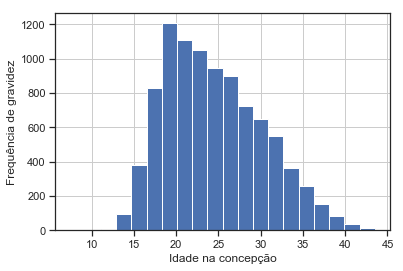

In [16]:
# biblioteca necessária
import matplotlib.pyplot as plt
import numpy as np

# plotando o histograma
plt.hist(agecon, bins=20)
plt.xlabel('Idade na concepção')
plt.ylabel('Frequência de gravidez')
plt.grid()
plt.show()

#### 1.7) Computando o peso no nascimento

Agora vamos reunir os passos desta primeira parte do código para calcular o peso médio dos bebês ao nascer, quando a gestação ocorreu acima de 37 semanas.

Eu forneci uma função, resample_rows_weighted, que pega os dados NSFG e os reamostra usando os pesos de amostragem em wgt2013_2015. O resultado é uma amostra representativa da população dos EUA.

Então eu extraio birthwgt_lb1 e birthwgt_oz1, substituindo códigos especiais por NaN, e calculo o peso total ao nascer.

In [17]:
# limpando as variáveis de peso
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# computando o peso total em kg (16 lb = 1kg)
birth_weight = pounds + ounces/16

# criando uma variável booleana dos bebês que nasceram de uma gestação acima de 37 semanas
full_term = nsfg['prglngth'] >= 37

# selecionando os bebês de gestação acima de 37 semanas
full_term_weight = birth_weight[full_term]

# computando a média de peso em kg
print('O peso médio dos bebês ao nascer nos EUA é de', np.round(full_term_weight.mean(),1), 'kg')

O peso médio dos bebês ao nascer nos EUA é de 7.4 kg


#### 1.8) Filtro

No exercício anterior calculei a média do peso para bebês nascidos acima de 37 semanas, filtrei bebês prematuros porque a distribuição de peso é diferente.

A distribuição de peso também é diferente para nascimentos múltiplos, como gêmeos e trigêmeos. Neste exercício, filtrei esses para vermos o efeito que isso tem na média.

In [18]:
# filtrando bebês que nasceram sem irmão gêmeo
single = nsfg['nbrnaliv'] == 1

# computando o peso de bebês que nasceram SEM irmão gêmeo e acima de 37 semanas
single_full_term_weight = birth_weight[single & full_term]
print('Média:', single_full_term_weight.mean())

Média: 7.385643450184502


In [19]:
# computando o peso de bebês que nasceram com irmão gêmeo e acima de 37 semanas
mult_full_term_weight = birth_weight[~single & full_term]
print('Média:', mult_full_term_weight.mean())

Média: 5.768055555555556


Agora que temos dados limpos, estamos prontos para explorar. Na parte do 2 do código, veremos as distribuições de variáveis no NSFG e exploraremos a relação entre educação e renda.

### 2) Distribuições

No primeira parte do código, depois de limpar e validar os dados, comecei a explorá-los usando histogramas para visualizar as distribuições. Agora vou mostrar como representar distribuições usando "Probability Mass Functions  (PMFs)" e "Cumulative Distribution Functions (CDFs)". Mostrarei quando usar cada um deles e por que.

Nessa segunda parte do código irei trabalhar com um novo conjunto de dados obtido do "General Social Survey (GSS)" (link: https://gss.norc.org/), no qual é uma pesquisa anual, que desde de 1972, conta com uma amostra representativa da população adulta dos EUA e que coleta dados sobre demografia e opiniões sobre política e sociedade. A pesquisa possui muitas variáveis, por isso foram selecionadas algumas variáveis no qual já foram validadas.

#### 2.1) PMF

O conjunto de dados do GSS será carregado um data frame chamado "gss".

Neste exercício, me concentrarei na variável "year" neste conjunto de dados, que representa o ano em que cada entrevistado foi entrevistado.

In [20]:
# carregando os dados do GSS
gss = pd.read_hdf('gss.hdf5', 'gss')

# visualizando as primeiras observações
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


Em estatística, a função massa de probabilidade é uma função que associa a cada possível ocorrência de uma variável aleatória discreta uma probabilidade.

In [21]:
# criando função de PMF
def PMF(x):
    df = pd.DataFrame()
    df['count'] = x.value_counts()
    df['item_counts'] = df.index
    df = df.sort_values(by='item_counts')
    df['PMF'] = df['count'] / df['count'].sum()
    return df

In [22]:
# PMF do ano
gss_year_pmf = PMF(gss['year'])

# visualizando primeiras observações
gss_year_pmf.head()

,count,item_counts,PMF
1972,1613,1972,0.025822
1973,1504,1973,0.024077
1974,1484,1974,0.023757
1975,1490,1975,0.023853
1976,1499,1976,0.023997


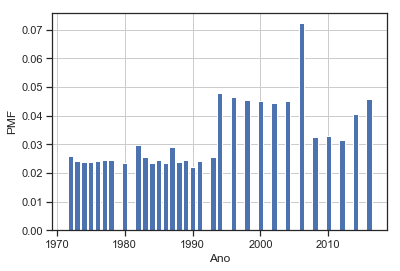

In [23]:
# plotando o histograma da PMF
plt.bar(gss_year_pmf['item_counts'], gss_year_pmf['PMF'])
plt.xlabel('Ano')
plt.ylabel('PMF')
plt.grid()
plt.show()

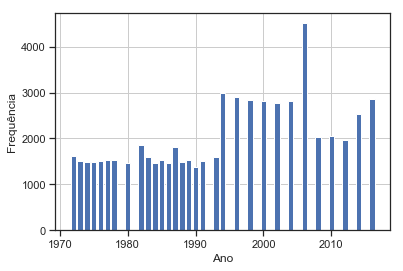

In [24]:
# plotando o histograma por ocorrência
plt.bar(gss_year_pmf['item_counts'], gss_year_pmf['count'])
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.grid()
plt.show()

Quantas pessoas foram entrevistados em 2016?

In [25]:
gss_year_pmf[(gss_year_pmf.item_counts == 2016)]

,count,item_counts,PMF
2016,2867,2016,0.045897


O exemplo anterior evidencia como a PMF facilita a obtenção de insights. Hora de visualizar o PMF para a variável de idade deste conjunto de dados do GSS!

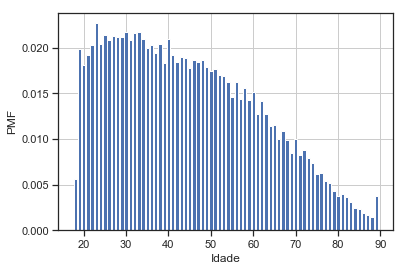

In [26]:
# PMF da idade
gss_age_pmf = PMF(gss['age'])

# plotando o histograma da PMF
plt.bar(gss_age_pmf['item_counts'], gss_age_pmf['PMF'])
plt.xlabel('Idade')
plt.ylabel('PMF')
plt.grid()
plt.show()

#### 2.2) CDF

A CDF é a probabilidade acumulada da PMF, ela é útil para encontrar probabilidades menores ou maiores de um determinado valor. 

In [27]:
# criando função da CDF
def CDF(x):
    df = pd.DataFrame()
    df['count'] = x.value_counts()
    df['item_counts'] = df.index
    df = df.sort_values(by='item_counts')
    df['PMF'] = df['count'] / df['count'].sum()
    df['CDF'] = df['PMF'].cumsum()
    return df

In [28]:
# CDF da idade
gss_age_cdf = CDF(gss['age'])

# visualizando primeiras observações
gss_age_cdf.head()

,count,item_counts,PMF,CDF
18.0,350,18.0,0.005620,0.005620
19.0,1238,19.0,0.019878,0.025497
20.0,1128,20.0,0.018111,0.043609
21.0,1197,21.0,0.019219,0.062828
22.0,1261,22.0,0.020247,0.083075


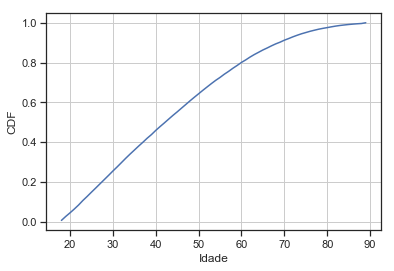

In [29]:
# plotando o histograma da CDF
plt.plot(gss_age_cdf['item_counts'], gss_age_cdf['CDF'])
plt.xlabel('Idade')
plt.ylabel('CDF')
plt.grid()
plt.show()

#### 2.3) Comparando distribuições

Vimos como é possível representar distribuições de probabilidade através da PMF e da CDF. Agora vamos usar a PMF e a CDF para comparar distribuições assim como veremos os prós e contras de cada uma delas.

Uma maneira de comparar distribuições é plotar multiplas PMFs no mesmo eixo. Como exemplo, vamos supor que queremos comparar as distribuições de idade entre respondentes homens e mulheres do conjunto de dados do GSS.

Primeiro criamos um "Series" boleano que é verdadeiro para repondentes do sexo masculino.

In [30]:
male = gss['sex'] == 1

Depois extraimos a coluna de idade.

In [31]:
age = gss['age']

Agora selecionamos as idades dos respondentes do sexo masculino e feminino respectivamente.

In [32]:
male_age = age[male]
female_age = age[~male] 

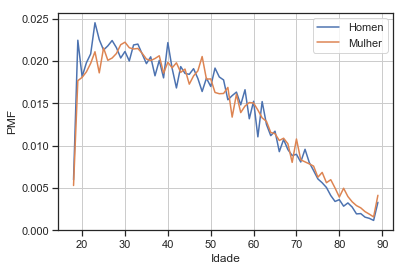

In [33]:
pmf_male_age = PMF(male_age)
pmf_female_age = PMF(female_age)

plt.plot(pmf_male_age['item_counts'], pmf_male_age['PMF'], label='Homen')
plt.plot(pmf_male_age['item_counts'], pmf_female_age['PMF'], label='Mulher')
plt.xlabel('Idade')
plt.ylabel('PMF')
plt.legend()
plt.grid()
plt.show()

Não fica clara a diferença entre as distribuições usado a PMF nesse caso. Vamos tentar com a CDF agora.

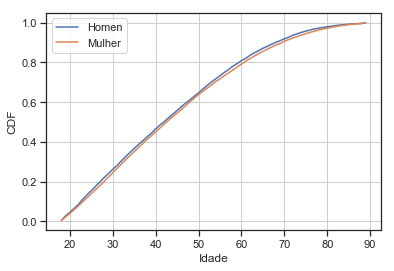

In [34]:
cdf_male_age = CDF(male_age)
cdf_female_age = CDF(female_age)

plt.plot(cdf_male_age['item_counts'], cdf_male_age['CDF'], label='Homen')
plt.plot(cdf_male_age['item_counts'], cdf_female_age['CDF'], label='Mulher')
plt.xlabel('Idade')
plt.ylabel('CDF')
plt.legend()
plt.grid()
plt.show()

No geral a CDF é mais suavizada comparada a PMF, e por conta dessa suavização da aleatoriedade podemos ter uma visão real das diferenças entre essas distribuições. Nesse caso vemos que as ditribuições são bem semelhantes, mas fica evidente que a curva azul está a esquerda da laranja, que mostra que os homens são mais jovens a cada percentil.

Vamos verificar mais um caso para esses dados, no caso a distribuição de renda comparando os entrevistados antes de 1995 e após 1995.

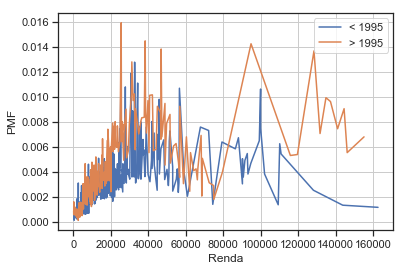

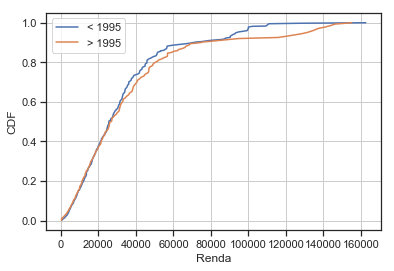

In [35]:
income = gss['realinc']
pre95 = gss['year'] < 1995 # serie boleana para respondentes entrevistados antes de 1995

# PMF
pmf_before1995 = PMF(income[pre95])
pmf_after1995 = PMF(income[~pre95])

plt.plot(pmf_before1995['item_counts'], pmf_before1995['PMF'], label='< 1995')
plt.plot(pmf_after1995['item_counts'], pmf_after1995['PMF'], label='> 1995')
plt.xlabel('Renda')
plt.ylabel('PMF')
plt.legend()
plt.grid()
plt.show()

# CDF
cdf_before1995 = CDF(income[pre95])
cdf_after1995 = CDF(income[~pre95])

plt.plot(cdf_before1995['item_counts'], cdf_before1995['CDF'], label='< 1995')
plt.plot(cdf_after1995['item_counts'], cdf_after1995['CDF'], label='> 1995')
plt.xlabel('Renda')
plt.ylabel('CDF')
plt.legend()
plt.grid()
plt.show()

Nesse caso a CDF mostra que a renda dos entrevistados após 1995 é maior.

Agora Vamos ver como é a distribuição de renda para pessoas com diferentes níveis de educação. Você pode fazer isso plotando as CDFs.

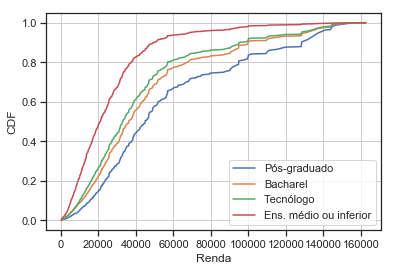

In [36]:
# selecionando a feature de educação
educ = gss['educ']

# pós-graduados
post = educ > 16
income_post = income[post]
cdf_post = CDF(income_post)

# bacharel
bach = ~post & (educ > 14)
income_bach = income[bach]
cdf_bach = CDF(income_bach)

# ensino técnico
tec = ~bach & (educ > 12)
income_tec = income[tec]
cdf_tec = CDF(income_tec)

# ensino médio ou menos
high = educ <= 12
income_high = income[high]
cdf_high = CDF(income_high)

# comparando CDF por nível de ensino
plt.plot(cdf_post['item_counts'], cdf_post['CDF'], label='Pós-graduado')
plt.plot(cdf_bach['item_counts'], cdf_bach['CDF'], label='Bacharel')
plt.plot(cdf_tec['item_counts'], cdf_tec['CDF'], label='Tecnólogo')
plt.plot(cdf_high['item_counts'], cdf_high['CDF'], label='Ens. médio ou inferior')
plt.xlabel('Renda')
plt.ylabel('CDF')
plt.legend()
plt.grid()
plt.show()

Não é surpreendente que pessoas com nível maior de ensino tenham renda mais elevada, mas olhando para essas distribuições, podemos ver onde estão as diferenças.

#### 2.4) Modelando distribuições

Na parte anterior do código vimos como usar a PMF e a CDF para plotar e comparar distribuições, e vimos que a PMF não funciona tão bem quando trabalhamos com dados com um número grande de valores unicos. 

Agora vamos explorar a função de densidade de probabilidade, ou "PDF" (probability density function), e verificar como estimar a PDF a partir dos dados.

Vamos começar pela distribuição normal, também chamada de distribuição Gaussiana. Para termos idéia de como uma distribuição normal se comporta, usarei o módulo de geração aleatória do NumPy para gerar 1.000 valores de uma distribuição normal e plotar sua CDF.

In [37]:
sample = np.random.normal(size=1000)

Vamos experiemntar a funçao da CDF da biblioteca SciPy ao invés da função que criamos anteriormente.

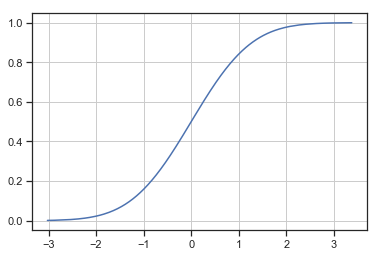

In [38]:
# importanto biblioteca necessária
import scipy

# plotando a CDF
norm_cdf = scipy.stats.norm.cdf(sample)
sns.lineplot(x=sample, y=norm_cdf)
plt.grid()
plt.show()

Essa é a curva sigmóide esperada, no qual permite vermos uma CDF com valores de uma distribuição normal.

O SciPy oferece um objeto chamado "norm", no qual representa uma distribuição normal. 

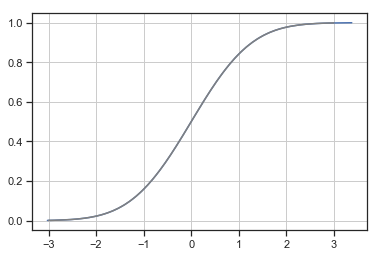

In [39]:
# importanto biblioteca necessária
from scipy.stats import norm

# comparando as CDFs
xs = np.linspace(-3,3) # array igualmente espaçada com pontos de -3 a 3 
ys = norm(0,1).cdf(xs) # cria um objeto que representa uma distribuição normal com média 0 e desvio padrão de 1, o ".cdf()" avalia CDF da distribuição normal
sns.lineplot(x=sample, y=norm_cdf)
plt.plot(xs, ys, color='gray')
plt.grid()
plt.show()

Como podemos ver no gráfico acima, a CDF dos nossos dados por todo o intervalo está muito próxima da CDF de uma distribuição normal. Pensando em uma situação real, nós poderíamos concluir que a distribuição normal é um bom modelo para esses dados.

O objeto "norm" também oferece o ".pdf()", no qual nos retorna a PDF dos dados. No exemplo a seguir vamos usa-lá para gerar a clássica curva em forma de sino ("bell curve", em inglês). Na sequência vamos plotar a curva de sino com a PDF dos nossos dados.

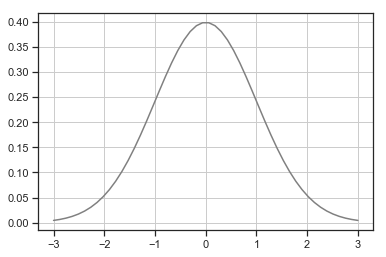

In [40]:
# curva de sino
xs = np.linspace(-3,3)
ys = norm(0,1).pdf(xs)
plt.plot(xs, ys, color='gray')
plt.grid()

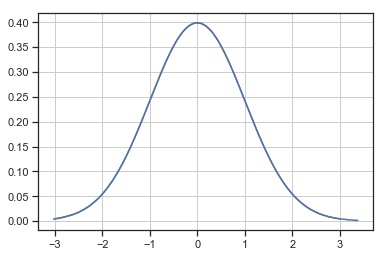

In [41]:
# curva de sino e a PDF dos nossos dados
norm_pdf = scipy.stats.norm.pdf(sample)
plt.plot(xs, ys, color='gray')
sns.lineplot(x=sample, y=norm_pdf)
plt.grid()
plt.show()

#### 2.4.1) Exemplo: distribuição de renda

Em muitos conjuntos de dados a distribuição de renda é aproximadamente lognormal, o que significa que os logaritmos das rendas se ajustam a uma distribuição normal. Vamos ver se isso é verdade para os dados do GSS. Primeiro vamos calcular a média e o desvio padrão do log de receitas usando a função np.log10( ) do NumPy.

Em seguida usaremos a média calculada e o desvio padrão para criar um objeto "norm" usando a função scipy.stats.norm( ).

In [42]:
# extraindo a feature realinc e computando o log da mesma
income = gss['realinc']
log_income = np.log10(income)

# computando a média e desvio padrão
mean = log_income.mean()
std = log_income.std()
print('Média:', mean)
print('Desv. padrão:', std)

Média: 4.371148677933652
Desv. padrão: 0.4290082383271419


In [43]:
# biblioteca necessária
from scipy.stats import norm

# criando o objeto norm
dist = norm(mean, std)

Para verificar se a distribuição de renda é modelada por uma distribuição lognormal, compararemos a CDF do logaritmo dos dados com uma distribuição normal com a mesma média e desvio padrão.

dist é um objeto scipy.stats.norm com a mesma média e desvio padrão dos dados. Ele fornece .cdf(), que avalia a função de distribuição cumulativa normal.

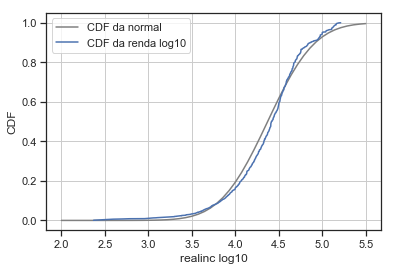

In [44]:
# CDF do modelo normal
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray', label='CDF da normal')

# visualizando a CDF do log_income
log_income_cdf = CDF(log_income)
plt.plot(log_income_cdf.CDF, label='CDF da renda log10')

plt.xlabel('realinc log10')
plt.ylabel('CDF')
plt.grid()
plt.legend()
plt.show()

O modelo lognormal é um bom ajuste para os dados, mas claramente não é a combinação perfeita. É assim que são os dados reais, não se encaixam perfeitamente ao modelo. Usaremos um método que usa pontos amostrados para gerar uma PDF, esse processo é chamado de estimativa de densidade kernel (em inglês "kernel density estimation", ou "KDE").

C:\Users\Semantix\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Semantix\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


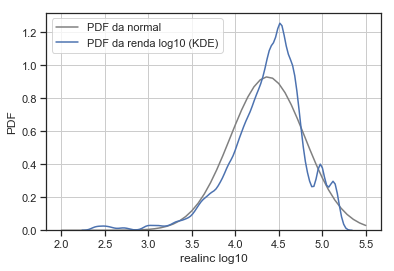

In [45]:
# PDF do modelo normal
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)
plt.plot(xs, ys, color='gray', label='PDF da normal')

# visualizando a PDF do log_income
sns.kdeplot(log_income, label='PDF da renda log10 (KDE)')
plt.xlabel('realinc log10')
plt.ylabel('PDF')
plt.grid()
plt.legend()
plt.show()

Até aqui demonstrei várias maneiras de visualizar e comparar distribuições: PMFs, CDFs e gráficos do KDE usando o seaborn. No próximo capítulo, exploraremos as relações entre variáveis, começando pelas alturas e pesos de uma grande pesquisa com adultos nos EUA.

### 3) Explorando relações entre dados

Até o momento exploramos os dados de maneira univariada. Agora vamos explorar relações entre as variáveis, no primeiro exemplo nós exploraremos a relação entre altura e peso. Usaremos aqui os dados do Behavioral Risk Factor Surveillance Survey, ou BRFSS, no qual é gerado pelos centros de controle de doenças dos EUA. A pesquisa é realizada por mais de 400.000 respondentes, mas para deixar as coisas mais fáceis, usaremos uma subamostra com 100.000 respondentes.

Uma maneira comum de visualizarmos a relação entre duas variáveis é a través do scatter plot, ou gráfico de dispersão. o Uso desse tipo de gráfico é comum e sua leitura é rápida.

Vamos começar utilizandos os dados do BRFSS.

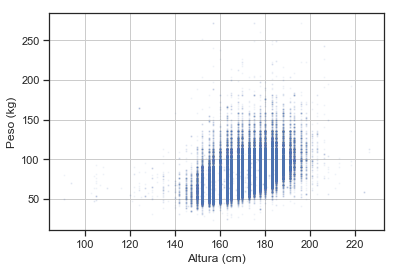

In [46]:
brfss = pd.read_hdf('brfss.hdf5', 'brfss')
height = brfss['HTM4'] # em cm
weight = brfss['WTKG3'] # em kg
plt.plot(
    height, # eixo x  
    weight, # eixo y 
    'o', # pontos como círculos 
    alpha=0.05, # tranparência 
    markersize=1 # tamanho dos pontos
)
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.grid()
plt.show()

Ainda não fica evidente a relação entre as duas variáveis em questão. É possível melhorar a visualização utilizando a técninca de jitter e aplicando um zoom sobre uma região de interesse, como veremos a seguir.

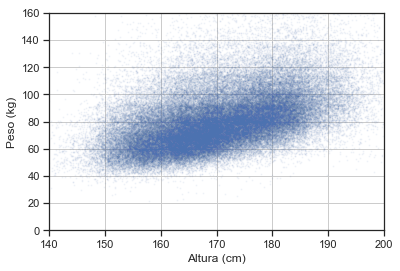

In [47]:
# jittering
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.05)
plt.axis([140,200,0,160])
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.grid()
plt.show()

Uma maneira interessante de visualizar relações entre os dados é atráves de boxplots, no qual é possível verificar a variação dos dados pelos quartis, em que as boras inferiores e superiores das caixas representam o primeiro e o terceiro quartil respectivamente, a linha do meio de cada caixa representa a mediana e as pontas das linhas na horizontal represental os limites inferiores e superiores. 

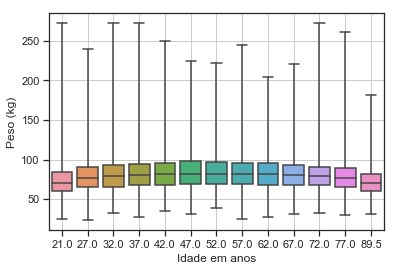

In [48]:
data = brfss.dropna(subset=['AGE','WTKG3']) # removando dados faltantes (missing values)
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.xlabel('Idade em anos')
plt.ylabel('Peso (kg)')
plt.grid()
plt.show()

Nos próximos dois exercícios, examinaremos as relações entre renda e outras variáveis. No BRFSS, a renda é representada como uma variável categórica,isto é, os entrevistados são atribuídos a uma das oito categorias de renda definidas. A variável é 'INCOME2'. Antes de conectar a renda a qualquer outra coisa, vejamos a distribuição calculando o PMF.

Começaremos visualizando a PMF de renda.

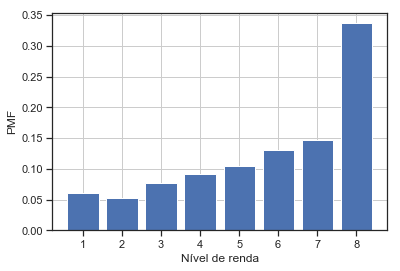

In [49]:
# variável de renda
income = brfss['INCOME2']

# PMF da variável de renda
income_pmf = PMF(income)

# plotando o gráfico da PMF de renda
plt.bar(income_pmf['item_counts'], income_pmf['PMF'])
plt.xlabel('Nível de renda')
plt.ylabel('PMF')
plt.grid()
plt.show()

Como podemosvre, quase metade dos entrevistados está na categoria de renda mais alta. Portanto, esse conjunto de dados não faz distinção entre os rendimentos mais altos e a mediana. Mas talvez isso possa nos dizer algo sobre pessoas com renda abaixo da mediana.

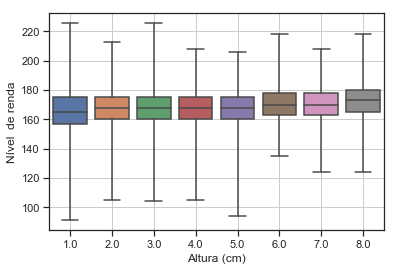

In [50]:
data = brfss.dropna(subset=['INCOME2','HTM4']) # removando dados faltantes (missing values)
sns.boxplot(x='INCOME2', y='HTM4', data=data, whis=10)
plt.xlabel('Altura (cm)')
plt.ylabel('Nível  de renda')
plt.grid()
plt.show()

Interessante. Parece que há uma relação fraca positiva entre renda e altura, pelo menos para rendas abaixo da mediana. A seguir, veremos algumas maneiras de quantificar a força desse relacionamento.

#### 3.1) Correlação

Na primeira parte desse capítulo nós vimos a relação entre pares de algumas variáveis. Agora nessa lição nós aprenderemos sobre coeficientes de correlação, no qual quantificamos a força dessas relações. Quando falamos sobre "correlação", isso quer dizer qualquer relação entre duas variáveis. Na estatística, usualmente é utilizada o coeficiente de correlação de Pearson, no qual varia de -1 a 1, esse número quantifica a força da relação linear entre variáveis. 

Para demonstrar, selecionarei três colunas do dataset do BRFSS:

In [51]:
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


O resultado acima é a matrix de correlação. Lendo a primeira linha, vemos que a correlação da HTM4 com ela mesma é de 1, e isso é o esperado pois a correlação de uma variável com ela mesma é 1. Em seguida vemos que há uma correlação positiva fraca entre HTM4 e WTKG3. A correlação entre HTM4 e AGE é negativa, porém desprezível, assim como a correlação entre AGE e WTKG3.

Porém devemos ter cuidado ao avaliarmos a correlação entre as variáveis utilizando somente o coeficiente de Pearson. No exemplo a seguir fica evidente que existe uma forte correlação entre as variáveis, porém não é linear!

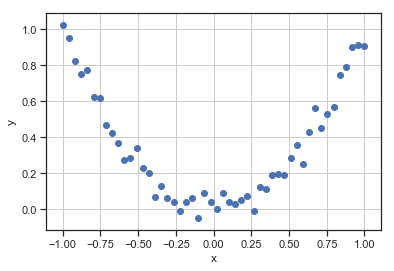

In [52]:
xs = np.linspace(-1, 1)
ys = xs**2
ys += np.random.normal(0, 0.05, len(xs))

# plotando a correlação 
plt.scatter(xs, ys)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Vamos verificar o coeficiente de Pearson, para esse caso:

In [53]:
np.corrcoef(xs, ys)

array([[ 1.        , -0.00156793],
       [-0.00156793,  1.        ]])

#### 3.2) Regressão simples

Vimos anteriormente que a correlação de Pearson nem sempre é suficiente para medir o que queremos. Uma alternativa é o uso da regressão linear simples.

Como vimos em um exercício anterior, a variável "_VEGESU1" representa o número de porções de vegetais que os entrevistados relataram comer por dia. Vamos estimar a inclinação da relação entre consumo de vegetais e renda.

In [54]:
from scipy.stats import linregress

# selecionando as variáveis
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# computando a regressão linear
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305)


Ótimo, a inclinação estimada indica o aumento do consumo de porções de vegetais em função da renda.

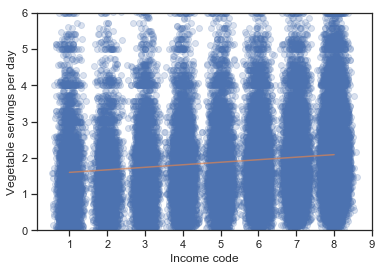

In [55]:
# gráfico de dispersão
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# plotando a reta ajustada aos dados
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

Muito bem, completamos o capítulo 3! Vimos várias maneiras de visualizar relacionamentos entre variáveis e quantificar sua força. No próximo capítulo, usaremos a regressão para explorar relações entre mais de duas variáveis.

### 4) Relações multivariadas

Nessa parte do código exploraremos relacionamentos multivariados usando regressão múltipla para descrever relacionamentos não-lineares e regressão logística para explicar e prever variáveis binárias.

Mas primeiro vamos explorar os limites da regressão linear simples. No exercício anterior fizemos o gráfico de dispersão do consumo de vegetais e renda, e plotamos a reta que melhor se ajusta aos dados.

Vamos executar a mesma regressão usando SciPy e StatsModels e verificar os resultados.

In [56]:
import statsmodels.formula.api as smf

# regressão com StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data=brfss).fit()
print(results.params)

Intercept    1.528779
INCOME2      0.069880
dtype: float64


In [57]:
from scipy.stats import linregress

# regressão com linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305)


Para examinar mais de perto a relação entre renda e educação, vamos usar a variável "educ" para agrupar os dados e plotar a renda média em cada grupo.

O conjunto de dados GSS é o DataFrame chamado gss.

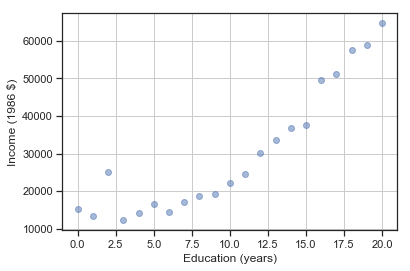

In [58]:
# agrupando pela educ
grouped = gss.groupby('educ')

# computando a média de cada grupo
mean_income_by_educ = grouped['realinc'].mean()

# scatter plot da média de renda e e tempo de educação em anos
plt.clf()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.grid()
plt.show()

O gráfico do exercício anterior sugere que a relação entre renda e educação não é linear. Então, vamos tentar ajustar um modelo não linear!

#### 4.1) Modelo não-linear de educação

O gráfico do exercício anterior sugere que a relação entre renda e educação não é linear. Então, vamos tentar ajustar um modelo não linear.

In [59]:
import statsmodels.formula.api as smf

# adicionando uma nova coluna com a educação ao quadrado
gss['educ2'] = gss['educ']**2

# Rodando um modelo com educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age', data=gss).fit()

# Parâmetros estimados
print(results.params)

Intercept    9553.182306
educ         -529.519738
educ2         168.460669
age            53.663727
dtype: float64


Excelente, a inclinação associada a educ2 é positiva, portanto o modelo curva para cima. 

Temos um modelo que prevê renda usando idade, educação e sexo.

Vamos ver o que ele prevê para diferentes níveis de educação, mantendo a idade constante.

In [60]:
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    11163.094124
1    10975.028703
2    10843.093451
3    10767.288367
4    10747.613452
dtype: float64


Agora vamos visualizar os resultados do exercício anterior!

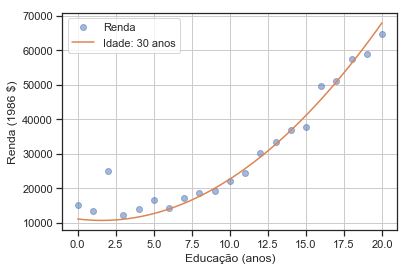

In [61]:
# plotando a média de renda para cada grupo de idade
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5, label='Renda')

# plotando as predições
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Idade: 30 anos')
plt.xlabel('Educação (anos)')
plt.ylabel('Renda (1986 $)')
plt.legend()
plt.grid()
plt.show()

Parece que este modelo captura muito bem a relação!

#### 4.2) Regressão logística

Vamos usar a regressão logística para prever uma variável binária. Especificamente, usaremos idade, sexo e nível de educação para prever o apoio à legalização da maconha nos EUA.

No conjunto de dados GSS, a variável grass registra a resposta para a pergunta "Você acha que o uso da maconha deve ser legalizado ou não?"

In [62]:
# transformando a variável resposta
gss['grass'].replace(2, 0, inplace=True)

# rodando a regressão logística
results = smf.logit('grass ~ age + educ + educ2 + C(sex)', data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588813
         Iterations 6


Intercept     -2.033614
C(sex)[T.2]   -0.384227
age           -0.016832
educ           0.222403
educ2         -0.004290
dtype: float64

Adicione uma coluna chamada educ e mantenha uma constante de 12 anos, depois calcule uma segunda coluna, educ2, que é o quadrado de educ.

In [63]:
# fazendo o data frame com o intervalo de idades
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# mantendo a feature de educação constante em 12
df['educ'] = 12
df['educ2'] = df['educ']**2

Gere previsões separadas para homens e mulheres.

In [64]:
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

Preencha as missing values para calcular a média da feature "grass" para cada faixa etária e em seguida, os argumentos de plt.plot() para plotar pred2 versus df['age'] com o rótulo "Feminino".

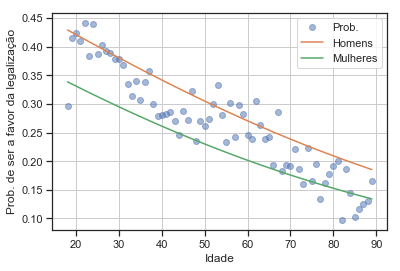

In [65]:
plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5, label='Prob.')

plt.plot(df['age'], pred1, label='Homens')
plt.plot(df['age'], pred2, label='Mulheres')

plt.xlabel('Idade')
plt.ylabel('Prob. de ser a favor da legalização')
plt.legend()
plt.grid()
plt.show()

### 5) Próximos passos

Bom chegamos ao final desse tutotrial, espero que ele tenha sido interessante e útil para você!

Vou sumarizar os tópicos abordados aqui, no qual também é o workflow dessa etapa em um projeto de data science:

_Análise exploratória dos dados:_
* Importar, limpar e validar os dados;
* Visualizar distribuições;
* Explorar relações entre as variáveis;
* Explorar relações multivariadas;

# Em contrução ;*